# Fitting the instantaneous firing rate of neurons subject to constant current stimulus with a logistic equation
#### Antonio Laville, Fabi, José Bargas$^1$, Elvira Galarraga$^1$, Marco Arieli Herrera-Valdez$^2$
##### $^1$ Departamento de Neurociencias, Instituto de Fisiología Celular, $^2$ Departamento de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México

__Abstract__

*Instantaneous firing rate data obtained from square pulse stimulation of a neuron is fit to a logistic equation using a least squares algorithm*

__Introduction__

The instantaneous firing rate of a neuron is often measured experimentally by applying a stimulus current in steps and recording the resulting fluctuations in the transmembrane potential, which often include action potentials. For instance, supose that the current stimulation amplitudes are s_0, s_1,...,s_n, in nA is applied. If $n+1$ action potentials occur during the $i$th current step with arrival times $t_{i0}, t_{i1},...,t_{in}$, the *instantaneous firing rates* are then the multiplicative inverses of the time differences between action potentials, 
\begin{equation}
y_{ik} = \frac{1}{t_{i,k+1}-t_{i k}}.
\end{equation}
The values of $y_{ik}$ are not the same. In fact, it is typical to observe *spike frequency adaptation*; that is $y_{ik} > y_{i,k+1}$, for $k=1,...,n$.
The average ifr for a given current stimulus $s_i$ would be then 
\begin{equation}
\bar{y}_i = n^{-1}\sum_{k=1}^{n} y_{ik}.
\end{equation} 

For simplicity, consider only the first interspike interval $y_{i1}$ as a measure of the instantáneous firing rate of the neuron given a stimulus of amplitude $s_i$, and ommit the subscript. The typical behaviour $y_{i}$ firing rates as a function of $s_k$ observed experimentally is that of a monotonically increasing function that reaches a maximum. However, it is worth noticing that, in biophysical models, the curve 
\begin{equation}
\left\{(s_i, y_i): i=1,...,n \right\}
\end{equation} 
increasing toward a maximum instantaneous firing rate, but it decreases slightly after reaching its maximum. 

In [119]:
import scipy as sc
import matplotlib.pylab as gr
from scipy.optimize import minimize
import scipy.optimize as optim
%matplotlib inline

In [153]:
# Data with initial (0,0) indicating that there were no spikes with 0-current
data= sc.array([[0.0,0.0],[0.25,25.42889],[0.31,31.89956],[0.384,38.18815],[0.448,44.81715],[0.566,51.74545],
                [0.713,58.4966],[0.845,65.15408],[1.002,69.04165],[1.128,70.54201],[1.285,77.51645]])
# Data without initial (0,0) 
#data= sc.array([[0.25,25.42889],[0.31,31.89956],[0.384,38.18815],[0.448,44.81715],[0.566,51.74545],[0.713,58.4966],[0.845,65.15408],[1.002,69.04165],[1.128,70.54201],[1.285,77.51645]])
s,y=data.transpose()

### Fitting the behaviour with a hyperbolic equation

As mentioned earlier, the instantaneous firing rate $u$ reaches a maximum $u_M$ for some level of current stimulation, with a basal value $u_0$. Assuming that such behaviour is monotonic, it is reasonable to assume that the dynamics of r are given by hyperbolic function of the form
\begin{equation}
r(s) = r_0 + r_M \frac{s^n}{b+s^n} 
\end{equation}
where $r_0$ and $r_M$ are the maximum and minimum firing rates, $b$ is a constant that controls the initial slope of the hyperbola, and $n$ is an exponent that controls the maximum rate of change of $r$ with respect to $s$. 




Now let us plot a data set describing the instantaneous firing rate recorded from a neuron with current steps 

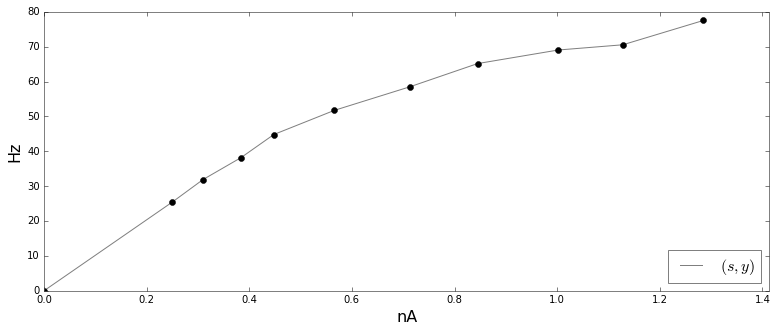

In [154]:
# Plot showing the data
gr.figure(figsize=(13,5))
gr.plot(s,y,'ko')
gr.plot(s,y,'k', alpha=0.5, label=r"$(s,y)$")
gr.xlim(0,s.max()*1.1)
gr.xlabel("nA",fontsize=16);gr.ylabel("Hz",fontsize=16)
gr.legend(loc="lower right",fontsize=16)
print()

#### Initial fit

In [155]:
# Create a dictionary with parameters and a function for the fit
p=dict()
p["r0"] = y[0]
p["rM"] = 90.0 
p["b"] = 0.4  
p["n"] = 1.2
p["s0"]= s[0]
ss = sc.arange(0, s.max(),0.05) 

def uFunction(s,p):
    ss= (s-p["s0"])**p["n"]
    return p["r0"]+ (p["rM"]-p["r0"]) * ss / (p["b"]**p["n"]+ss)

Note that the initial stimulus in the data is not zero. To adjust the data, insert a translation $s-s_0$ to take the initial stimulus into account.

[ 0.     0.25   0.31   0.384  0.448  0.566  0.713  0.845  1.002  1.128
  1.285]



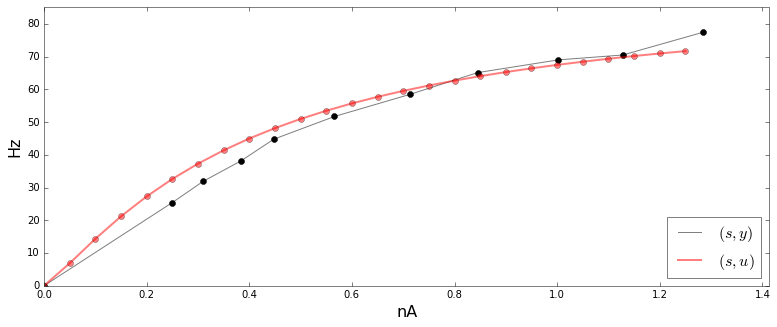

In [156]:
# Obtain a candidate trace for the fitting
u= uFunction(ss,p)
print(s)
# Plot showing the fits and the data
gr.figure(figsize=(13,5))
gr.plot(s,y,'ko')
gr.plot(s,y,'k', alpha=0.5, label=r"$(s,y)$")
gr.plot(ss,u,'r', alpha=0.5,lw=2, label=r"$(s,u)$")
gr.plot(ss,u,'ro', alpha=0.5,lw=1)
gr.xlim(s[0]*0.5,s.max()*1.1)
gr.ylim(0,y.max()*1.1)
gr.xlabel("nA",fontsize=16);gr.ylabel("Hz",fontsize=16)
gr.legend(loc="lower right",fontsize=16)
print()

### Curve fitting via least squares
Fitting uses the Levenburg-Marquardt gradient method (greedy algorithm) to minimise the objective function. See 
https://python4mpia.github.io/fitting_data/least-squares-fitting.html for details.

In [150]:
# Objective function
def oFunction(s,rM,n,b,s0,r0):
    ss= (s-s0)**n
    #ss= s**n
    return r0+ (rM-r0) * ss / (b**n +ss)

In [152]:
# Initial guess for the parameters
p["rM"] = 98.0 
p["b"] = 0.1025  
p["n"] = 1.1
p["s0"]= s[0]
p["r0"] = y[0]
# Initial errors
errors= 0.001*sc.ones(len(y))
guess= sc.array([p["rM"],p["n"],p["b"],p["s0"],p["r0"]])
#guess= sc.array([p["rM"],p["n"],p["b"],p["r0"]])
# Fitting
pars, covMatrix=optim.curve_fit(oFunction, s, y, guess, errors)

rM,n,b,r0=pars
#rM,n,b,s0,r0=pars
print("The parameters are: rM=%g,n=%g, b=%g, s0=%g,u0=%g,"%(rM,n,b,s0,r0))
print("The covariance matrix (4x4) is:")
print(covMatrix)


The parameters are: rM=nan,n=nan, b=nan, s0=nan,u0=nan,
The covariance matrix (4x4) is:
[[ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel-4.3.1-py3.5.egg/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


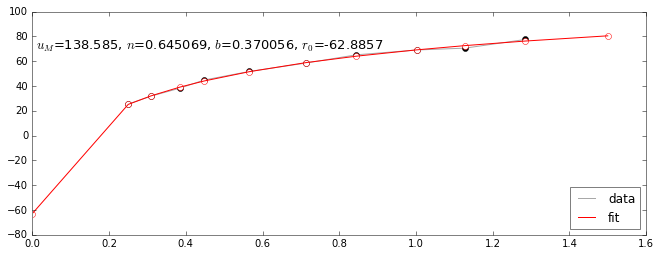

In [146]:
# Setup a new set of s-values to illustrate the curve with extra values for a complete range
newS=sc.sort(sc.hstack((s,sc.array([0,1.5]))))
newY=oFunction(newS,rM,n,b,r0)
#
gr.figure(figsize=(11,4))
gr.plot(s,y,'ko')
gr.plot(s,y,'k',alpha=0.34,label='data')
gr.plot(newS,newY,'wo',markeredgecolor="r")
gr.plot(newS,newY,'r',label="fit")
str0=r"$u_M$=%g, $n$=%g, $b$=%g, $r_0$=%g"%(rM,n,b,r0)
gr.text(0.01,70,str0,fontsize=13)
gr.legend(loc="lower right")
